In [50]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [58]:
#loading dataset
iris=load_iris()

#converting it to pandas dataframe
df = pd.DataFrame(iris.data, columns=iris.feature_names)

#Adding species column
df['species'] = iris.target

#mapping numerical values to species
df['species'] = df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

#displaying head of the dataset
print("\n Head of the dataset")
print(df.head())

#displaying shape of the dataset
print("\n Shape of the dataset",df.shape)

#Info 
print("\n Info")
df.info()

#summary
print("\n Summary Stats")
df.describe()




 Head of the dataset
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

 Shape of the dataset (150, 5)

 Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [25]:
#preparing the dataset for analysis
#checking for null values
print("Null Values")
df.isnull().sum()

Null Values


sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

Class distribution:
species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


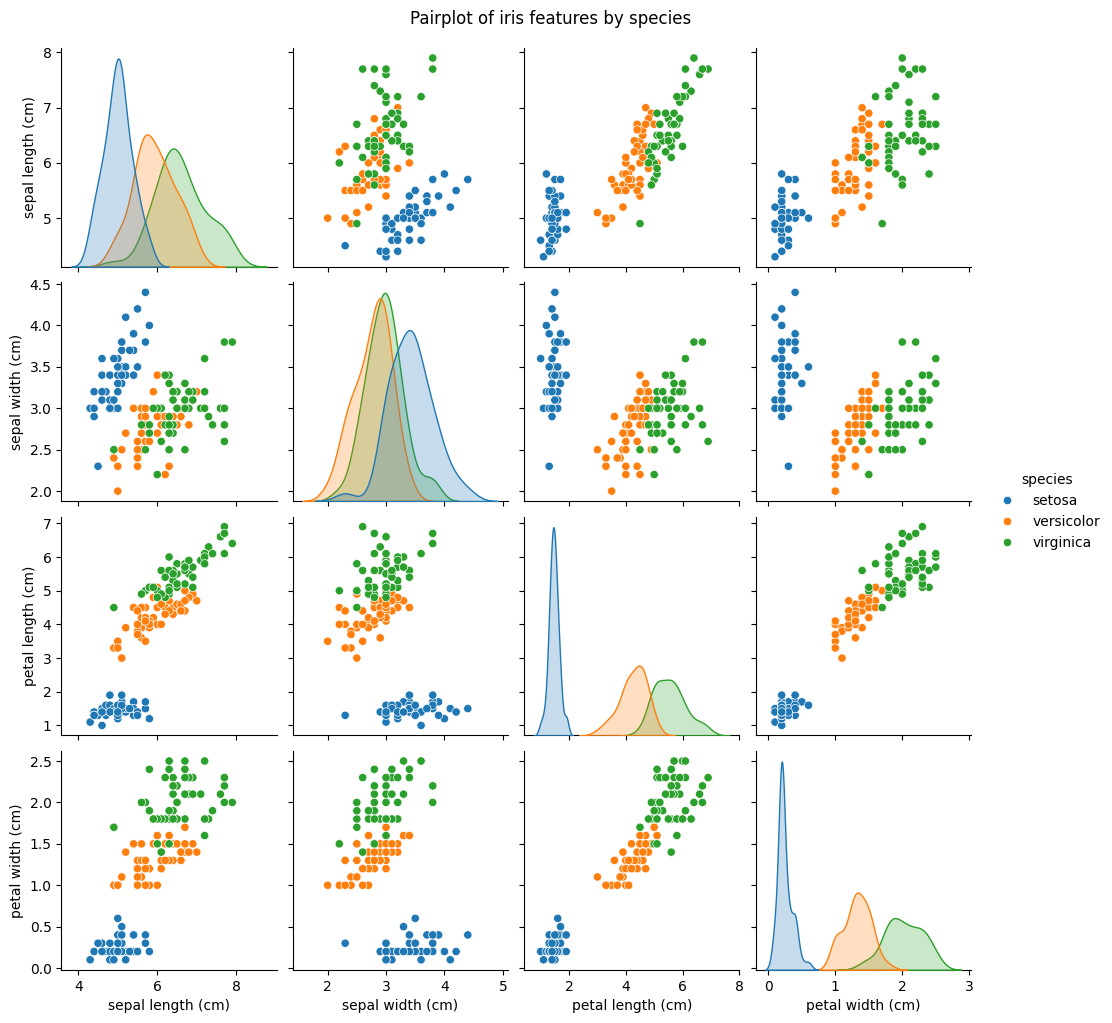

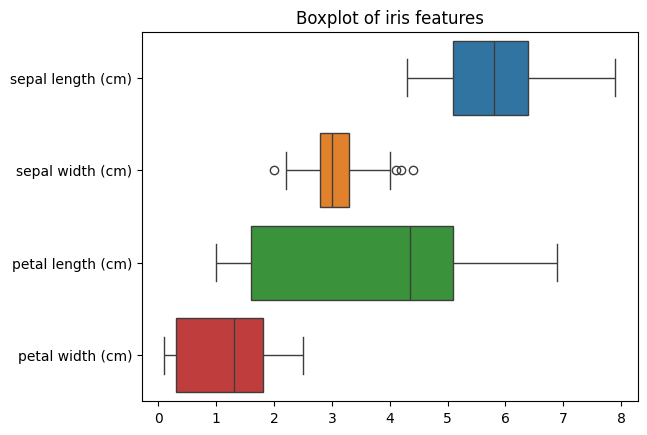

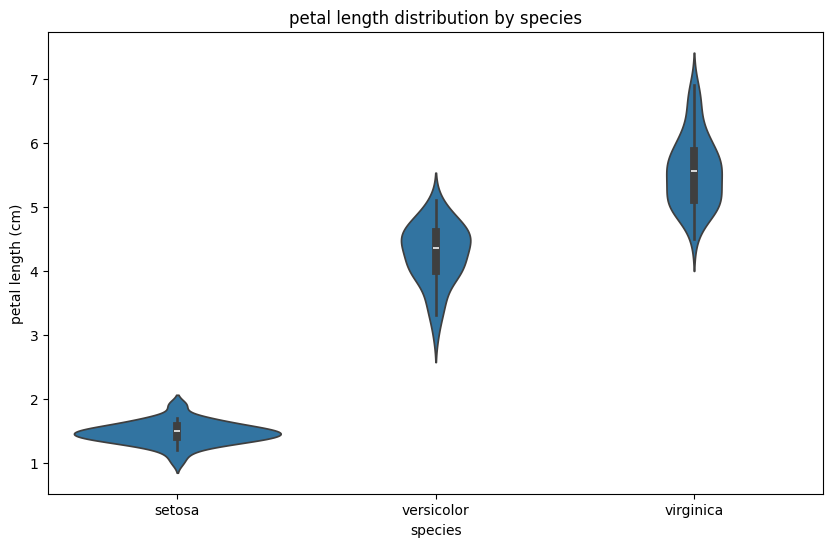

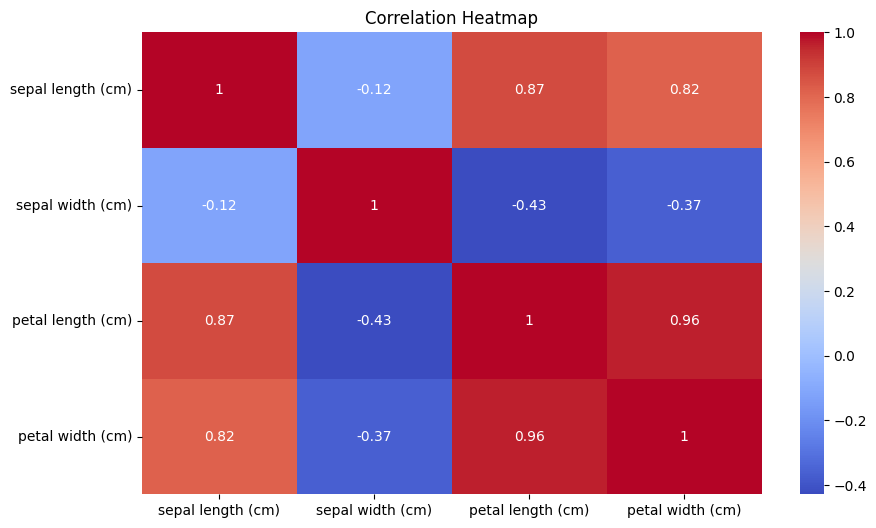

<Figure size 800x600 with 0 Axes>

In [44]:
#Class distribution
print("Class distribution:")
print(df['species'].value_counts())

#pairplot to show how features relate across species
sns.pairplot(df, hue='species')
plt.suptitle("Pairplot of iris features by species",y=1.02)
plt.show()

#Boxplot features distribution for each species
sns.boxplot(data=df, orient='h')
plt.title("Boxplot of iris features")
plt.figure(figsize=(10,6))

#violin plot for distribution of petal length by species
sns.violinplot(data=df, x='species', y='petal length (cm)')
plt.title("petal length distribution by species")
plt.figure(figsize=(10,6))

#correlation heatmap
sns.heatmap(df.drop('species', axis=1).corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.figure(figsize=(8, 6))
plt.show()

In [46]:
#splitting features and target
X=df.drop('species', axis=1)
y=df['species']

In [48]:
#Training and Testing
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.2, random_state=42)

In [52]:
#LogisticRegression
lr_model=LogisticRegression(max_iter=200)
lr_model.fit(X_train,y_train)

y_pred=lr_model.predict(X_test)

#Evaluation metrics
print("Accuarcy:", accuracy_score(y_test,y_pred))
print("Confusion matrix:", confusion_matrix(y_test,y_pred))
print("Classification Report:", classification_report(y_test,y_pred))

Accuarcy: 1.0
Confusion matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [55]:
#RandomForestClassifier
Rf_model=RandomForestClassifier(n_estimators=100, random_state=42)
Rf_model.fit(X_train,y_train)

y_pred=Rf_model.predict(X_test)

#Evaluation metrics
print("Accuarcy:", accuracy_score(y_test,y_pred))
print("Confusion matrix:", confusion_matrix(y_test,y_pred))
print("Classification Report:", classification_report(y_test,y_pred))

Accuarcy: 1.0
Confusion matrix: [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [57]:
def predict_iris_from_user():
    print("Enter flower measurements to predict species:\n")

    sepal_length = float(input("Sepal length (cm): "))
    sepal_width  = float(input("Sepal width  (cm): "))
    petal_length = float(input("Petal length (cm): "))
    petal_width  = float(input("Petal width  (cm): "))

    # Create input DataFrame with correct feature names
    user_input = pd.DataFrame([[sepal_length, sepal_width, petal_length, petal_width]],
                              columns=iris.feature_names)

    # Make prediction (use the better model: Random Forest)
    prediction = Rf_model.predict(user_input)

    print(f"\n🌼 Predicted species: {prediction[0].capitalize()}")

# Call the function
predict_iris_from_user()


Enter flower measurements to predict species:



Sepal length (cm):  3.0
Sepal width  (cm):  2.5
Petal length (cm):  1.5
Petal width  (cm):  2.0



🌼 Predicted species: Setosa
